# 4. előadás
_Tartalom_: Fájlok, flagek (r, w, b, +), szöveges formátumok, csv, matplotlib

A mai előadás során a `matplotlib` néhány funkcióját vesszük sorra. A `matplotlib` egy python modul, ami egyszerűbb (és összettettebb) grafikonok megjelenítését segítő függvények, osztályok definícióit tartalmazza. Ennek telepítése után a 
``` python 
import matplotlib.pyplot as plt
```
parancsával importálhatjuk. Ha (mint jelen esetben is) jupyter notebookban és nem felugró ablakként szeretnénk a grafikonokat megjeleníteni akkor szükség lesz a
``` python 
%matplotlib inline
```
parancsra is. Nézzünk pár egyszerű példát.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

x0 = [1, 2, 3, 4, 5, 6, 7]
y0 = [9, 8, 2, 6, 5, 4, 3]
y1 = [3, 4, 0, 9, 9, 1, 0]

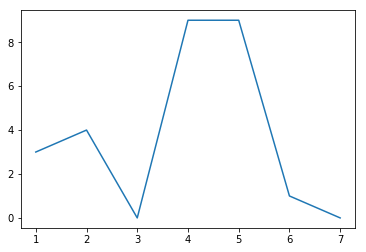

In [2]:
plt.plot(x0, y1)
plt.show()

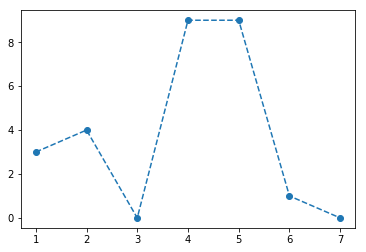

In [3]:
plt.plot(x0, y1, "o--")
plt.show()

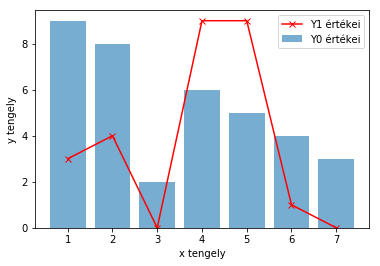

In [4]:
plt.plot(x0, y1, "rx-", label="Y1 értékei")
plt.bar(x0, y0, alpha=0.6, label="Y0 értékei")
plt.xlabel("x tengely")
plt.ylabel("y tengely")
plt.legend()
plt.show()

Windowsban visszaperrel (backslash) jelöljük a az elérési út összefűzését, míg linuxon perrel (slash).

Linux verzió:
``` python
/herno/Desktop/textfile.txt
```

Windows verzió:
``` python
\\herno\\Desktop\\textfile.txt
```

Hogy ezt az ellenmondást feloldjuk a Pythonban használhatjuk az `os.path.join` függvényt. Például, próbáljuk ki a következő kódot:
``` python
import os
print(os.path.join("herno", "Desktop", "textfile.txt"))
```

ekkor az eredmény linuxon
```
/herno/Desktop/textfile.txt
```
lesz, míg windowson
```
herno\Desktop\textfile.txt
```
vagy
```
"\\herno\\Desktop\\textfile.txt"
```


Példa feladatunk telemetriás adatokból indul ki. 
A csatolt `.csv` fájlok táblázatos formában tartalmazzák egyetemünk Szenergy hallgatói csapatának telemetriás adatait többek közt spanyol (Murcia), holland (Rotterdam) és angol (London) versenyekről. A csapat belső szabályzatának értelmében ezek érzékeny adatok, így nincs benne minden mért adat, illetve kisebb mintavételezéssel vannak bent adatok. Ettől függetlenül a `.csv`-k valós versenyeken mért sebességeket és egy egyéb adatokat tartalmaznak.  A mért adatok nem ekvidisztánsak, nem tökéletesen tartják a 2 Hz-es (0,5 másodperc) mintavételezést, ennek oka, hogy egy mobil internettel a verseny közben feltöltött adatbázisból származnak.

A `.csv` fájlok nagyjából így néznek ki:

```
Time;SpeedRpm;SpeedKmph;GasSignal;LapNumber;MotorCommError; ... AuxiliaryBattery
38,45;0;0;0,019043;0;false;false;false;14;0,80563;51,5603;false;1;12,9713
41,75;0;0;0,0193481;0;false;false;false;14;0,80563;51,5603;false;1;12,9713
42,3;0;0;0,0190735;0;false;false;false;14;0,80563;51,5603;false;1;12,9687
...
```

|Time|SpeedRpm|SpeedKmph|GasSignal|LapNumber|MotorCommError|...|AuxiliaryBattery|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|38,45|0|0|0,019043|0|false|...|12,9713|
|41,75|0|0|0,0193481|0|false|...|12,9713|
|42,3|0|0|0,0190735|0|false|...|12,9687|

Fontosabb mezők:
- Time: az idő másodpercben `(float)`
- SpeedKmph: a sebesség km/h-ban `(float)`
- LapNumber: az aktuális kör `(int)`
- BmsVoltage: akkumulátorfeszülség `(float)`

#### Feladat

Írjuk ki 1010 és 1015 másodperc között a idő értékekhez tartozó akkumulátorfeszülséget és sebességet.

In [5]:
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline

file = os.path.join("data", "szenergy_2014_10_17_16_06_rotterdam.csv")
with open(file, 'rt') as csvfile:
     spamreader = csv.DictReader(csvfile, delimiter=';', quotechar='"')
     for row in spamreader:
         if 1010 < float(row['Time'].replace(',','.')) < 1015:
             print("%s s\t%s km/h\t%s v" % (row['Time'], row['SpeedKmph'], row['BmsVoltage']))

1010,4 s	22,0439 km/h	50,199 v
1011,15 s	21,352 km/h	50,199 v
1011,65 s	20,9869 km/h	50,199 v
1012,25 s	20,942 km/h	50,199 v
1012,85 s	20,7178 km/h	50,199 v
1013,4 s	20,2373 km/h	50,199 v
1013,95 s	19,9042 km/h	50,199 v
1014,45 s	19,8145 km/h	50,199 v


#### Feladat

Rajzoltassuk ki a 2-4. kör sebességegeit km/h-ban.

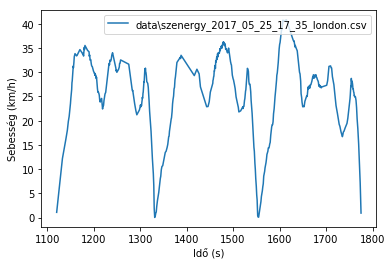

In [6]:
file = os.path.join("data", "szenergy_2017_05_25_17_35_london.csv")
#file = os.path.join("data", "szenergy_2014_10_17_16_06_rotterdam.csv")
with open(file, 'rt') as csvfile:
     spamreader = csv.DictReader(csvfile, delimiter=';', quotechar='"')
     xt = []
     ys = []
     for row in spamreader:
         if 2 <= int(row['LapNumber'].replace(',','.')) <= 4:
             xt.append(float(row['Time'].replace(',','.')))
             ys.append(float(row['SpeedKmph'].replace(',','.')))
plt.plot(xt, ys, label = file)
plt.xlabel("Idő (s)")
plt.ylabel("Sebesség (km/h)")
plt.legend()
plt.show()

Ahogy látszik a jármű 20 és 30 km/h közötti sebességgel haladt legtöbbször, lévén a verseny célja az üzemanyag takarékosság, ahol a nem a leggyorsabb, hanem a legkevesebb felhasznált energiával megtett kör a
feladat.

## _Used sources_ / Felhasznált források
- [Shannon Turner: Python lessons repository](https://github.com/shannonturner/python-lessons) MIT license (c) Shannon Turner 2013-2014
- [Siki Zoltán: Python mogyoróhéjban](http://www.agt.bme.hu/gis/python/python_oktato.pdf) GNU FDL license (c) Siki Zoltán
- [BME AUT](https://github.com/bmeaut) MIT License Copyright (c) BME AUT 2016-2018